In [3]:
import numpy as np
from glob import glob
import pickle
from sklearn.preprocessing import StandardScaler
from ase.io import read

In [3]:
test_files = sorted(glob('spect2/tmlcc_dataset/mof_cif_test/*.npy'), key=lambda x: int(x.split('/')[-1].split('.')[0].split('_')[-1]))
stacked_test = np.stack([np.load(f) for f in test_files])

In [11]:
pretest_files = sorted(glob('spect2/tmlcc_dataset/mof_cif_pretest/*.npy'), key=lambda x: int(x.split('/')[-1].split('.')[0].split('_')[-1]))
stacked_pretest = np.stack([np.load(f) for f in pretest_files])

In [10]:
train_files = sorted(glob('spect2/tmlcc_dataset/*train*/*.npy'), key=lambda x: int(x.split('/')[-1].split('.')[0].split('_')[-1]))
stacked_train = np.stack([np.load(f) for f in train_files])

In [12]:
np.save('stacked_train.npy', stacked_train)

In [13]:
np.save('stacked_pretest.npy', stacked_pretest)

In [4]:
np.save('stacked_test.npy', stacked_test)

In [4]:
n_test_files = sorted(glob('tmlcc_dataset/mof_cif_test/*.cif'), key=lambda x: int(x.split('/')[-1].split('.')[0].split('_')[-1]))
chem_len_test = np.stack([len(read(f).get_chemical_symbols()) for f in n_test_files])
np.save('chem_len_test.npy', chem_len_test)

/opt/tljh/user/lib/python3.7/site-packages/ase/io/cif.py:404: UserWarning: crystal system 'triclinic' is not interpreted for space group 1. This may result in wrong setting!
  setting_name, spacegroup))
/opt/tljh/user/lib/python3.7/site-packages/ase/io/cif.py:404: UserWarning: crystal system 'monoclinic' is not interpreted for space group 1. This may result in wrong setting!
  setting_name, spacegroup))
/opt/tljh/user/lib/python3.7/site-packages/ase/spacegroup/spacegroup.py:435: UserWarning: scaled_positions 180 and 181 are equivalent
  (kinds[ind], kind))
/opt/tljh/user/lib/python3.7/site-packages/ase/spacegroup/spacegroup.py:435: UserWarning: scaled_positions 216 and 217 are equivalent
  (kinds[ind], kind))
/opt/tljh/user/lib/python3.7/site-packages/ase/io/cif.py:404: UserWarning: crystal system 'orthorhombic' is not interpreted for space group 1. This may result in wrong setting!
  setting_name, spacegroup))
/opt/tljh/user/lib/python3.7/site-packages/ase/spacegroup/spacegroup.py:435

In [5]:
n_train_files = sorted(glob('tmlcc_dataset/mof_cif_train/*.cif'), key=lambda x: int(x.split('/')[-1].split('.')[0].split('_')[-1]))
chem_len_train = np.stack([len(read(f).get_chemical_symbols()) for f in n_train_files])
np.save('chem_len_train.npy', chem_len_train)

/opt/tljh/user/lib/python3.7/site-packages/ase/spacegroup/spacegroup.py:435: UserWarning: scaled_positions 165 and 166 are equivalent
  (kinds[ind], kind))
/opt/tljh/user/lib/python3.7/site-packages/ase/spacegroup/spacegroup.py:435: UserWarning: scaled_positions 95 and 96 are equivalent
  (kinds[ind], kind))
/opt/tljh/user/lib/python3.7/site-packages/ase/spacegroup/spacegroup.py:435: UserWarning: scaled_positions 152 and 153 are equivalent
  (kinds[ind], kind))
/opt/tljh/user/lib/python3.7/site-packages/ase/spacegroup/spacegroup.py:435: UserWarning: scaled_positions 195 and 196 are equivalent
  (kinds[ind], kind))
/opt/tljh/user/lib/python3.7/site-packages/ase/spacegroup/spacegroup.py:435: UserWarning: scaled_positions 232 and 233 are equivalent
  (kinds[ind], kind))
/opt/tljh/user/lib/python3.7/site-packages/ase/spacegroup/spacegroup.py:435: UserWarning: scaled_positions 235 and 236 are equivalent
  (kinds[ind], kind))
/opt/tljh/user/lib/python3.7/site-packages/ase/spacegroup/spacegro

In [6]:
train_files = sorted(glob('spect/tmlcc_dataset/mof_cif_train/*.npy'), key=lambda x: int(x.split('/')[-1].split('.')[0].split('_')[-1]))
stacked_train2 = np.stack([np.load(f) for f in train_files])

In [7]:
test_files = sorted(glob('spect/tmlcc_dataset/mof_cif_test/*.npy'), key=lambda x: int(x.split('/')[-1].split('.')[0].split('_')[-1]))
stacked_test2 = np.stack([np.load(f) for f in test_files])

In [1]:
chem_len_train.shape

NameError: name 'chem_len_train' is not defined

In [9]:
np.save('stacked_train2.npy', stacked_train2)
np.save('stacked_test2.npy', stacked_test2)

In [28]:
np.save('stacked_train_reshape.npy', stacked_train2.reshape((-1, 16016)) / chem_len_train.reshape((-1, 1)) / 100)
np.save('stacked_test_reshape.npy', stacked_test2.reshape((-1, 16016)) / chem_len_test.reshape((-1, 1)) / 100)

In [11]:
import matplotlib.pyplot as plt

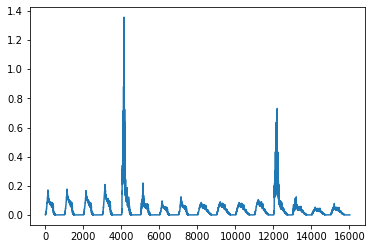

In [26]:
plt.plot((stacked_train2.reshape((-1, 16016)) / chem_len_train.reshape((-1, 1)) / 100 ).max(axis=0))

In [ ]:
plt.plot((stacked_test2.reshape((-1, 16016)) / chem_len_train.reshape((-1, 1)) / 100 ).max(axis=0))

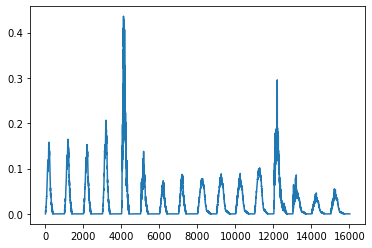

In [27]:
plt.plot((stacked_test2.reshape((-1, 16016)) / chem_len_test.reshape((-1, 1)) / 100  ).max(axis=0))

In [ ]:
np.stdstacked_train2

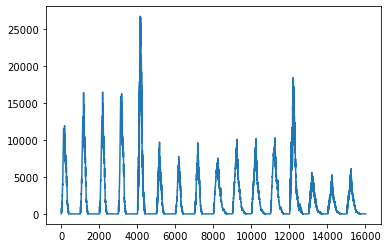

In [25]:
plt.plot(stacked_test2.reshape((-1, 16016)).max(axis=0))

In [ ]:
plt.plot(stacked_test2.reshape((-1, 16016)).mean(axis=0))

In [18]:
scl = StandardScaler()
stacked_train_reshaped = (np.clip(scl.fit_transform(stacked_train2.reshape((-1, 16016))), -1, 1) + 1)/2
stacked_test_reshaped = (np.clip(scl.transform(stacked_test2.reshape((-1, 16016))), -1, 1) + 1)/2

KeyboardInterrupt: 

In [ ]:
plt.plot(stacked_test2.reshape((-1, 16016)).mean(axis=0))

In [15]:
stacked_train[:,1:22:3, :].shape

(68613, 7, 200)

In [12]:
stacked_test2.shape

(16998, 16, 1001)

In [13]:
stacked_train2.shape

(68604, 16, 1001)

In [8]:
fs[0]

'spect/tmlcc_dataset/mof_cif_pretest/mof_unit_pretest_1.cif.npy'

In [ ]:
stacked_pretest = np.stack([np.load(f) for f in pretest_files])

In [5]:
!ls -l spect/tmlcc_dataset/mof_cif_pretest/*.npy

-rw-r--r-- 1 jupyter-phatham jupyter-phatham 128256 Oct  3 10:47 spect/tmlcc_dataset/mof_cif_pretest/mof_unit_pretest_1000.cif.npy
-rw-r--r-- 1 jupyter-phatham jupyter-phatham 128256 Oct  3 10:48 spect/tmlcc_dataset/mof_cif_pretest/mof_unit_pretest_1001.cif.npy
-rw-r--r-- 1 jupyter-phatham jupyter-phatham 128256 Oct  3 10:47 spect/tmlcc_dataset/mof_cif_pretest/mof_unit_pretest_1002.cif.npy
-rw-r--r-- 1 jupyter-phatham jupyter-phatham 128256 Oct  3 10:48 spect/tmlcc_dataset/mof_cif_pretest/mof_unit_pretest_1003.cif.npy
-rw-r--r-- 1 jupyter-phatham jupyter-phatham 128256 Oct  3 10:47 spect/tmlcc_dataset/mof_cif_pretest/mof_unit_pretest_1004.cif.npy
-rw-r--r-- 1 jupyter-phatham jupyter-phatham 128256 Oct  3 10:47 spect/tmlcc_dataset/mof_cif_pretest/mof_unit_pretest_1005.cif.npy
-rw-r--r-- 1 jupyter-phatham jupyter-phatham 128256 Oct  3 10:48 spect/tmlcc_dataset/mof_cif_pretest/mof_unit_pretest_1006.cif.npy
-rw-r--r-- 1 jupyter-phatham jupyter-phatham 128256 Oct  3 10:47 spect/tmlcc_datase